In [6]:
import collections
import functools
import numpy as np
from typing import List, Iterable, Any, Union, Optional, overload
import matplotlib.pyplot as plt
import sympy
import networkx as nx
from scipy.linalg import dft
from tqdm import notebook

In [7]:
import linear_regression as lr_util
import topology as topo

# Doubly stochastic hierarchically banded (DSHB) factorization algorithm

In [16]:
n = 43
n_sub = [32, 8, 3]
n_sub_facts = [[2,2,2,2,2], [2,2,2], [3]]
max_period = max(len(fact) for fact in n_sub_facts)

for sub, sub_facts in zip(n_sub, n_sub_facts):
    assert sub == np.prod(sub_facts)

In [9]:
A_full = np.zeros((n, n))

In [32]:
# phase 1
return_A_list = []
for i in range(max_period):
    A_full = np.zeros((n, n))
    start = 0   
    for sub_size, sub_facts in zip(n_sub, n_sub_facts):
        a_sub = topo.dynamic_hypercuboid(i, sub_facts)
        stop = start + sub_size
        A_full[start:stop, start:stop] = a_sub
        start = stop
    return_A_list.append(A_full)

In [66]:
# Phase 2
num_blocks = len(n_sub)
s = 0
return_A_list2 = []

for s_block in range(num_blocks-1):
    A_full = np.zeros((n, n))
    m_self = n_sub[s_block]
    m_all = sum(n_sub[s_block:])
    m_k_rest = sum(n_sub[s_block+1:])
    # Previous
    A_full[:s, :s] = np.eye(s)
    # A_11
    A_full[s:s+m_self, s:s+m_self] = np.eye(m_self)
    A_full[s:s+m_k_rest, s:s+m_k_rest] = np.eye(m_k_rest) * m_k_rest / m_all
    # A_12
    A_full[s:s+m_k_rest, s+m_self:] = np.eye(m_k_rest) * m_self / m_all
    # A_21
    A_full[s+m_self:, s:s+m_k_rest] = np.eye(m_k_rest) * m_self / m_all
    # A_22
    A_full[s+m_self:s+m_all, s+m_self:s+m_all] = np.eye(m_k_rest) * m_k_rest / m_all
    
    return_A_list2.append(A_full)
    s += m_self

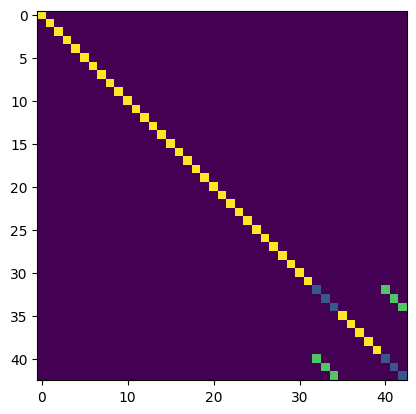

In [67]:
plt.imshow(return_A_list2[1])
plt.show()

In [72]:
A_full = np.eye(n)
for A in return_A_list:
    A_full @= A

for A in return_A_list2:
    A_full @= A

for A in return_A_list:
    A_full @= A

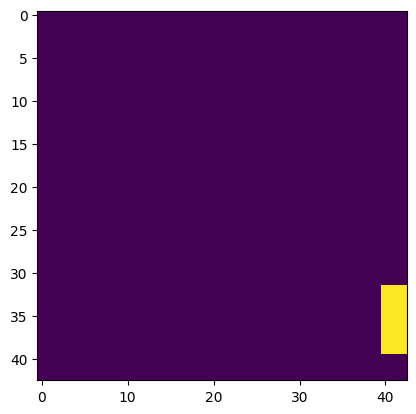

In [73]:
plt.imshow(A_full)
plt.show()

In [90]:
np.max(A_full * n - np.ones((n, n)))

2.220446049250313e-16